In [ ]:
def fact(n):
    product = 1
    for i in range(n):
        product = product * (i+1)
    return product

print(fact(5))

120


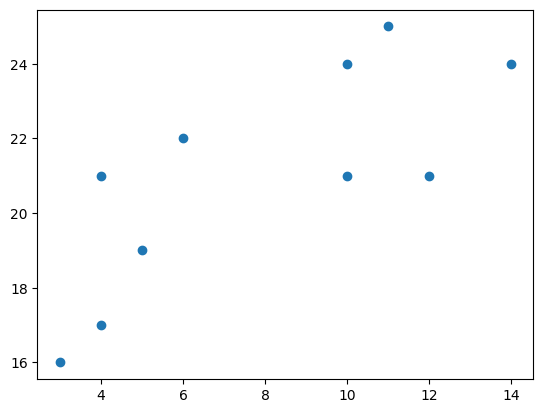

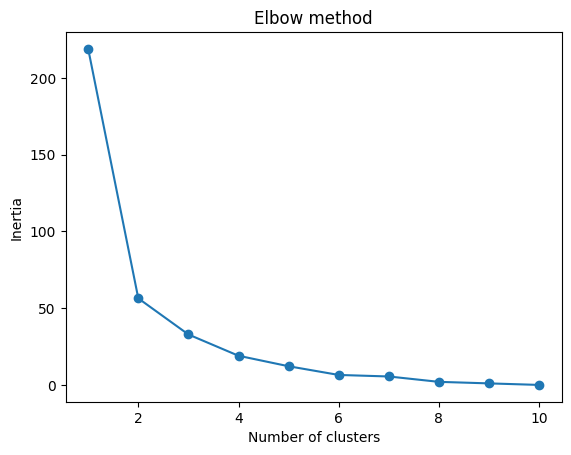

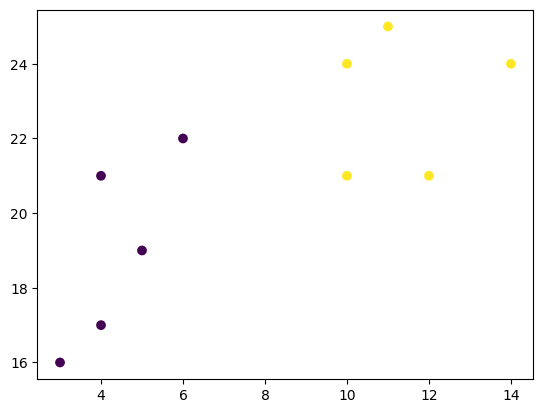

In [ ]:
## k-means clustering algorithm in Python.

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

## How many clusters should I define? Use elbow method.
plt.scatter(x, y)
plt.show()

from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Cluster available data around k (in this case, k=2) mean x,y values.

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
## Traveling Salesman Problem (TSP) Algorithm

n = 3
dist = [[0, 0, 0, 0, 0], [0, 0, 10, 15, 20], [
        0, 10, 0, 25, 25], [0, 15, 25, 0, 30], [0, 20, 25, 30, 0]]

## memoization for top down recursion
memo = [[-1]*(1 << (n+1)) for _ in range(n+1)]


def fun(i, mask):
    if mask == ((1 << i) | 3):
        return dist[1][i]

    ## memoization
    if memo[i][mask] != -1:
        return memo[i][mask]

    ## result of this sub-problem
    res = 10**9

    ## we have to travel all nodes j in mask and end the path at ith node
    ## so for every node j in mask, recursively calculate cost of
    ## travelling all nodes in mask
    ## except i and then travel back from node j to node i taking
    ## the shortest path take the minimum of all possible j nodes
    for j in range(1, n+1):
        if (mask & (1 << j)) != 0 and j != i and j != 1:
            res = min(res, fun(j, mask & (~(1 << i))) + dist[j][i])
    memo[i][mask] = res  # storing the minimum value
    return res


## Driver program to test above logic
ans = 10**9
for i in range(1, n+1):
    ## try to go from node 1 visiting all nodes in between to i
    ## then return from i taking the shortest route to 1
    ans = min(ans, fun(i, (1 << (n+1))-1) + dist[i][1])

## Calculate shortest possible distance (most efficient tour)
print("The cost of most efficient tour = " + str(ans))

The cost of most efficient tour = 50


In [11]:
## Quicksort algorithm.
def partition(array, low, high):

    ## choose the rightmost element as pivot
    pivot = array[high]

    ## pointer for greater element
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])

    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1


def quickSort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)


data = [1, 7, 4, 1, 10, 9, -2]
print("Unsorted Array")
print(data)

size = len(data)

quickSort(data, 0, size - 1)

print("Ascending Sort")
print(data)

%timeit partition([1, 7, 4, 1, 10, 9, -2], 0, 6)
%timeit quickSort([1, 7, 4, 1, 10, 9, -2], 0, 6)

Unsorted Array
[1, 7, 4, 1, 10, 9, -2]
Ascending Sort
[-2, 1, 1, 4, 7, 9, 10]
676 ns ± 185 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.94 µs ± 60.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
## Calculate a factorial and find the execution time statistics.
def fact2(n):
    if n == 0:
        return 1
    else:
        return n * fact2(n-1)

print(fact2(5))

%timeit fact2(50)

120
4.71 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
